<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Forecast_SARIMAX_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(color_codes=True)

In [2]:
! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d gabrielramos87/an-online-shop-business

an-online-shop-business.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/an-online-shop-business.zip', 'r')
zip_file.extractall('/content/')

In [4]:
df = pd.read_csv('/content/Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [5]:
df = df[['Date', 'CustomerNo', 'Price', 'Quantity']]
df.head()

,Date,CustomerNo,Price,Quantity
0,12/9/2019,17490.0,21.47,12
1,12/9/2019,13069.0,10.65,36
2,12/9/2019,13069.0,11.53,12
3,12/9/2019,13069.0,10.65,12
4,12/9/2019,13069.0,11.94,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        536350 non-null  object 
 1   CustomerNo  536295 non-null  float64
 2   Price       536350 non-null  float64
 3   Quantity    536350 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.4+ MB


In [7]:
df.isna().sum()

Date           0
CustomerNo    55
Price          0
Quantity       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape[0]

536295

In [10]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [11]:
df['sales'] = df['Price'] * df['Quantity']

In [12]:
df.head()

,Date,CustomerNo,Price,Quantity,sales
0,2019-12-09,17490.0,21.47,12,257.64
1,2019-12-09,13069.0,10.65,36,383.40
2,2019-12-09,13069.0,11.53,12,138.36
3,2019-12-09,13069.0,10.65,12,127.80
4,2019-12-09,13069.0,11.94,6,71.64


In [13]:
average_sales = df['sales'].mean()
standard_sales = df['sales'].std()

threshold_sales = average_sales + 2 * standard_sales
df['is_Anomaly'] = df['sales'] > threshold_sales

In [14]:
df.head()

,Date,CustomerNo,Price,Quantity,sales,is_Anomaly
0,2019-12-09,17490.0,21.47,12,257.64,False
1,2019-12-09,13069.0,10.65,36,383.40,False
2,2019-12-09,13069.0,11.53,12,138.36,False
3,2019-12-09,13069.0,10.65,12,127.80,False
4,2019-12-09,13069.0,11.94,6,71.64,False


In [15]:
df['Date'] = df['Date'].sort_values()

In [16]:
df.head()

,Date,CustomerNo,Price,Quantity,sales,is_Anomaly
0,2019-12-09,17490.0,21.47,12,257.64,False
1,2019-12-09,13069.0,10.65,36,383.40,False
2,2019-12-09,13069.0,11.53,12,138.36,False
3,2019-12-09,13069.0,10.65,12,127.80,False
4,2019-12-09,13069.0,11.94,6,71.64,False


In [17]:
new_df = df.groupby('Date')['sales'].mean()
new_df = pd.DataFrame(new_df).reset_index()
new_df.head()

,Date,sales
0,2018-12-01,105.200658
1,2018-12-02,123.894169
2,2018-12-03,93.941944
3,2018-12-05,72.584275
4,2018-12-06,70.282231


In [18]:
fig = px.line(x=new_df['Date'], y=new_df['sales'], labels={'x':'Date', 'y':'Sales'})
fig.show()

# Forecast Using Prophet

In [31]:
forecast_data = new_df.rename(columns={'Date':'ds',
                                   'sales':'y'})

forecast_data.head()

,ds,y
0,2018-12-01,105.200658
1,2018-12-02,123.894169
2,2018-12-03,93.941944
3,2018-12-05,72.584275
4,2018-12-06,70.282231


In [32]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecast = model.make_future_dataframe(periods=365)
prediction = model.predict(forecast)
plot_plotly(model, prediction)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4tyaxr17/a9p1icsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4tyaxr17/zsbj6kkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40489', 'data', 'file=/tmp/tmp4tyaxr17/a9p1icsm.json', 'init=/tmp/tmp4tyaxr17/zsbj6kkn.json', 'output', 'file=/tmp/tmp4tyaxr17/prophet_modelfk_u3_sc/prophet_model-20231020122844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:28:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:28:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecast Using SARIMA

In [21]:
dummy = new_df
# dummy.set_index('Date', inplace=True)
# dummy.index = pd.to_datetime(dummy.index)

In [35]:
dummy.head()

,Date,sales
0,2018-12-01,105.200658
1,2018-12-02,123.894169
2,2018-12-03,93.941944
3,2018-12-05,72.584275
4,2018-12-06,70.282231


In [34]:
new_df.head()

,Date,sales
0,2018-12-01,105.200658
1,2018-12-02,123.894169
2,2018-12-03,93.941944
3,2018-12-05,72.584275
4,2018-12-06,70.282231


In [36]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    305 non-null    object 
 1   sales   305 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


<Figure size 640x480 with 0 Axes>

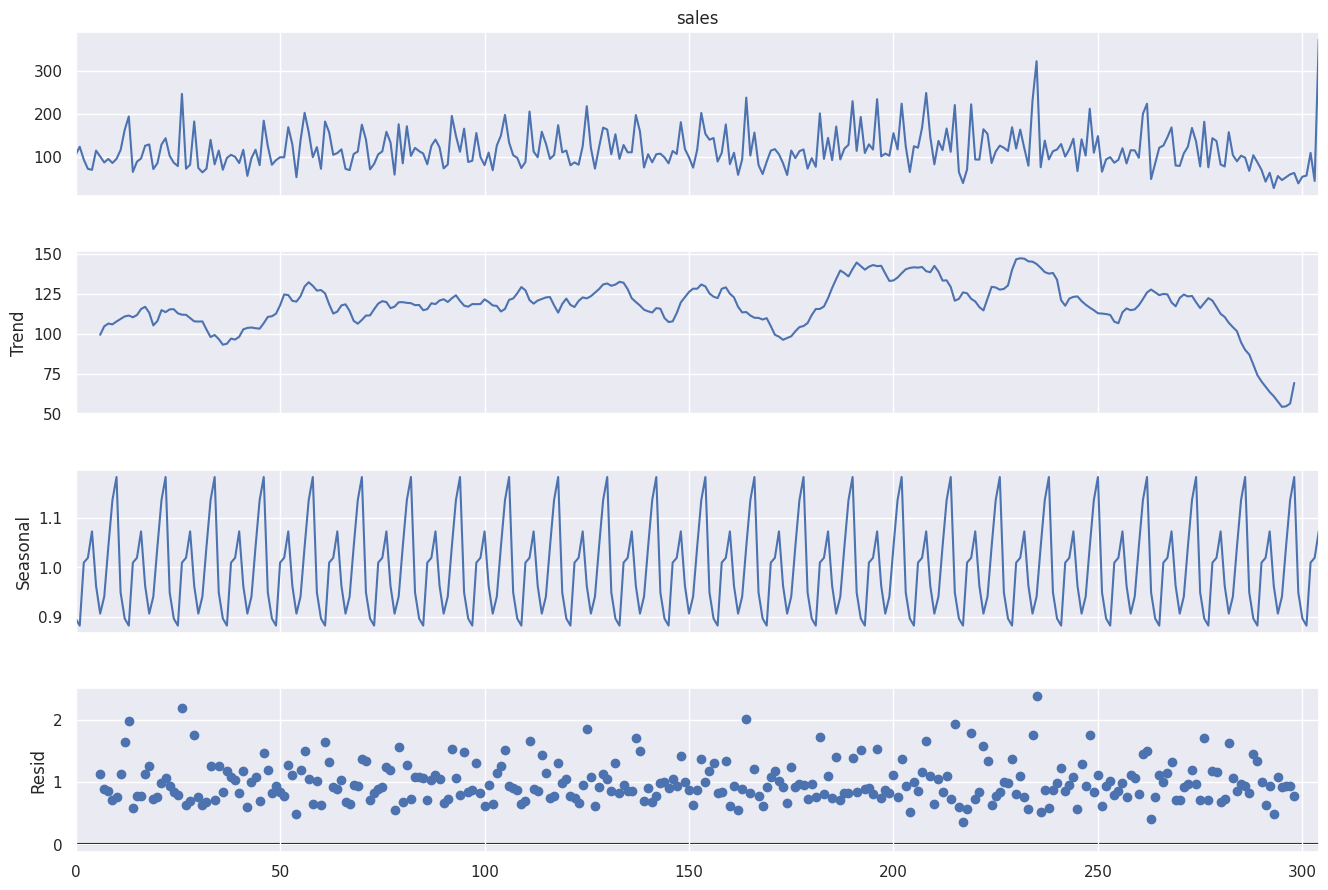

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummy["sales"],
                            model='multiplicative',
                            period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

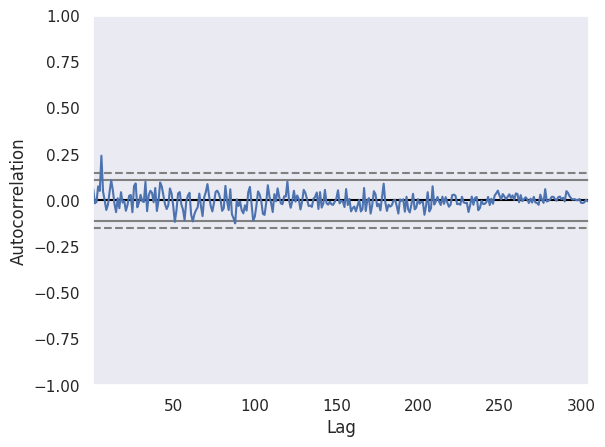

In [38]:
pd.plotting.autocorrelation_plot(dummy['sales'])

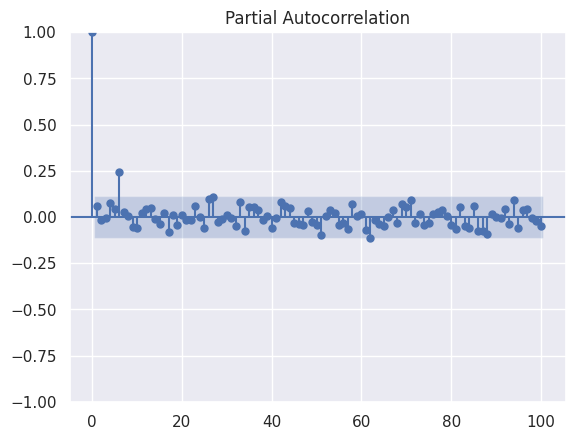

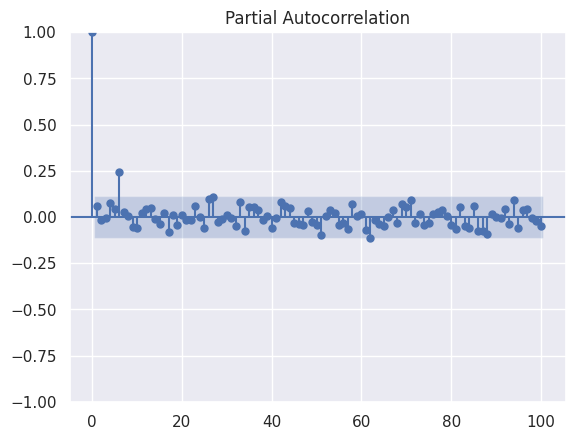

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dummy["sales"], lags = 100)

In [40]:
import statsmodels.api as sm
import warnings

p, d, q = 4, 1, 1

model=sm.tsa.statespace.SARIMAX(dummy['sales'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  305
Model:             SARIMAX(4, 1, 1)x(4, 1, 1, 12)   Log Likelihood               -1548.067
Date:                            Fri, 20 Oct 2023   AIC                           3118.134
Time:                                    12:30:32   BIC                           3158.579
Sample:                                         0   HQIC                          3134.335
                                            - 305                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0316      0.063      0.501      0.616      -0.092       0.155
ar.L2          0.0029      0.072   

In [44]:
predictions = model.predict(len(dummy), len(dummy)+24)
print(predictions)

305    103.284293
306     98.507701
307    106.613984
308    139.566858
309    130.963446
310    135.580007
311     97.055509
312    102.910763
313     98.665887
314    118.238835
315    110.777821
316    164.615350
317    109.077761
318    105.089859
319    109.835254
320    122.860341
321    133.874590
322    136.522179
323    104.054803
324    110.088386
325    100.353876
326    118.234493
327    114.683629
328    133.471016
329    108.023412
Name: predicted_mean, dtype: float64


In [42]:
dummy.head()

,Date,sales
0,2018-12-01,105.200658
1,2018-12-02,123.894169
2,2018-12-03,93.941944
3,2018-12-05,72.584275
4,2018-12-06,70.282231


<Axes: >

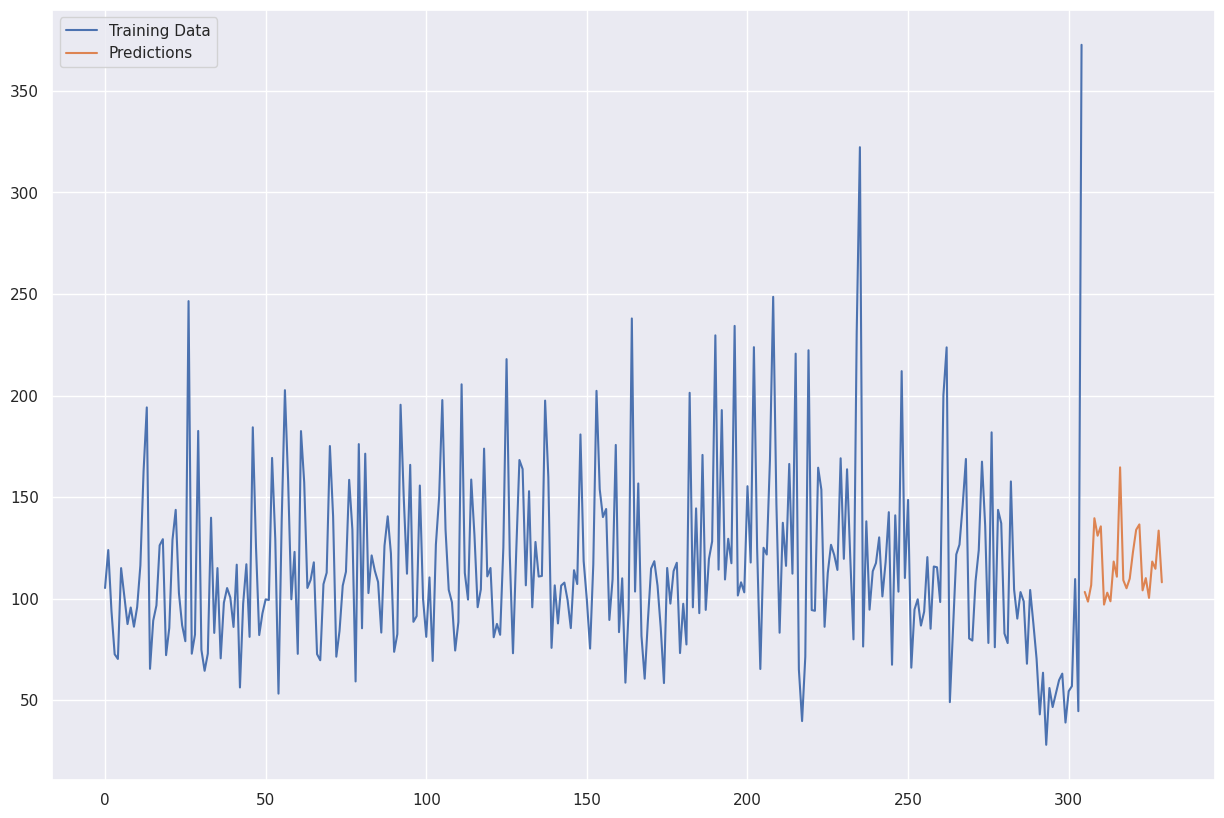

In [45]:
dummy["sales"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")